# Simple linear regression
## practical 7

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
data = pd.read_csv("Advertising.csv")
print()
print(data)
print(data.columns)


     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
5             6    8.7   48.9       75.0    7.2
6             7   57.5   32.8       23.5   11.8
7             8  120.2   19.6       11.6   13.2
8             9    8.6    2.1        1.0    4.8
9            10  199.8    2.6       21.2   10.6
10           11   66.1    5.8       24.2    8.6
11           12  214.7   24.0        4.0   17.4
12           13   23.8   35.1       65.9    9.2
13           14   97.5    7.6        7.2    9.7
14           15  204.1   32.9       46.0   19.0
15           16  195.4   47.7       52.9   22.4
16           17   67.8   36.6      114.0   12.5
17           18  281.4   39.6       55.8   24.4
18           19   69.2   20.5       18.3   11.3
19           20  147.3   23.9       19.

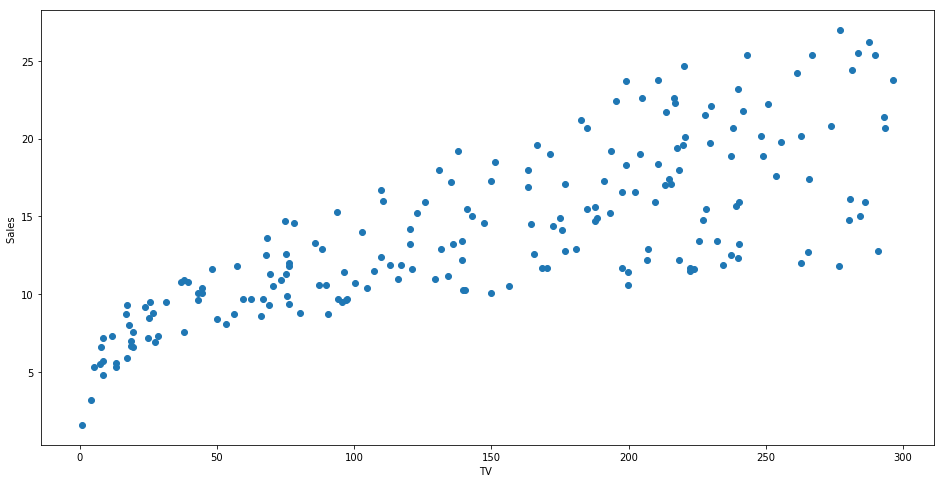

In [4]:
plt.figure(figsize=(16, 8))
plt.scatter(
data['TV'],
data['sales']
)
plt.xlabel("TV ")
plt.ylabel("Sales ")
plt.show()

In [5]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
reg = LinearRegression()
reg.fit(X_train, y_train)

(140, 1)
(60, 1)
(140, 1)
(60, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
print(reg.coef_[0][0])
print(reg.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.04581434217189623
7.310810165411681
The linear model is: Y = 7.3108 + 0.045814X


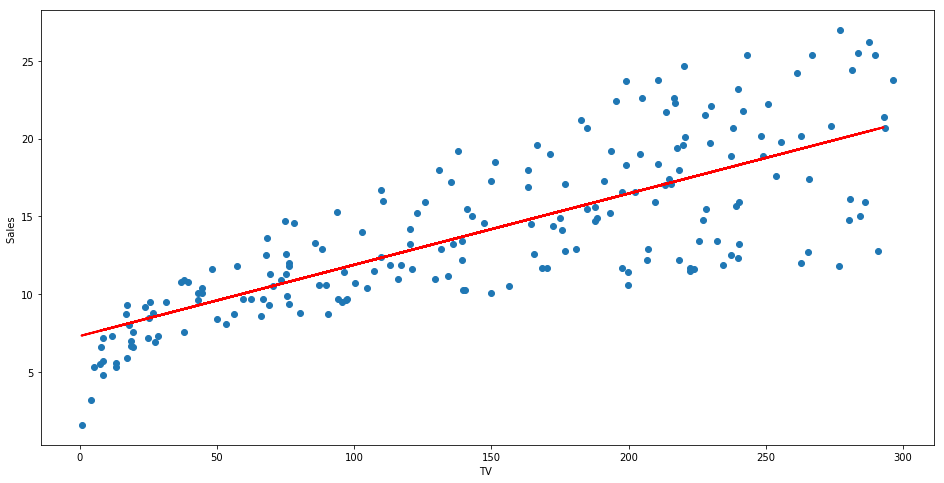

In [8]:
predictions = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(
data['TV'],
data['sales']
)
plt.plot(
X_test,
predictions,
linewidth=2,
color='red'
)
plt.xlabel("TV ")
plt.ylabel("Sales ")
plt.show()

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


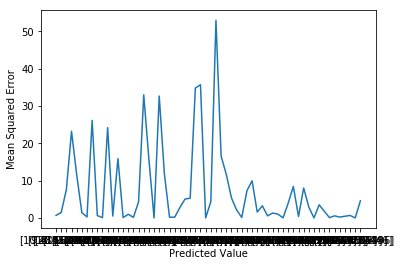

In [10]:
errors = list()
for i in range(len(y_test)):
# calculate error
    err = (y_test[i] - predictions[i])**2
# store error
    errors.append(err)
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predictions)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

In [12]:
print('Train Score :', reg.score(X_train,y_train))
print('Test Score:', reg.score(X_test,y_test))

Train Score : 0.5552336104251212
Test Score: 0.725606346597073


In [13]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(y_test,predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MSE : 7.497479593464674
RMSE : 2.7381525876883988


# Multiple linear regression


In [17]:
data = pd.read_csv(r"Advertising.csv")


Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2] ))

X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.58e-96
Time:                        11:00:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------